In [52]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import torch

from PIL import Image
from transform_factory import resize_322, center_crop_224, imagenet_normalize, tensorize, get_spatial_transform, get_color_transform, resize_232, resize_224, PIL2Tensor
from torchvision import transforms
from expl import ExplFactory
from captum.attr import visualization as viz
from torchvision.models import resnet50, ResNet50_Weights
from captum.attr import LayerAttribution
import torch.nn.functional as F

In [23]:
T_spatial, T_inv_spatial, T_config = get_spatial_transform()
T_config

{'flip_horizon': 0, 'flip_vertical': 0, 'rot_angle': -44.610382080078125}

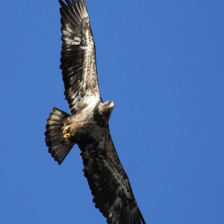

In [61]:
# orig_img_path = "/home/juhyeon/Imagenet/train/n02100236/n02100236_18.JPEG"
# orig_img_path = "/home/juhyeon/Imagenet/train/n01443537/n01443537_605.JPEG"
orig_img_path = "/home/juhyeon/Imagenet/train/n01614925/n01614925_13.JPEG"
# orig_img_path = "/home/juhyeon/Imagenet/train/n02100236/n02100236_390.JPEG"


model = resnet50(weights = ResNet50_Weights.DEFAULT).eval().cuda()


orig_img = Image.open(orig_img_path)
_orig_img = tensorize(center_crop_224(resize_232(orig_img))).unsqueeze(0).cuda()

expl_method = "LayerXAct"
expl_func = ExplFactory().get_explainer(model = model, expl_method = expl_method)

# center_crop_224(resize_322(orig_img))

# center_crop_224(resize_322(center_crop_224(resize_322(orig_img))))
center_crop_224(resize_322(orig_img))


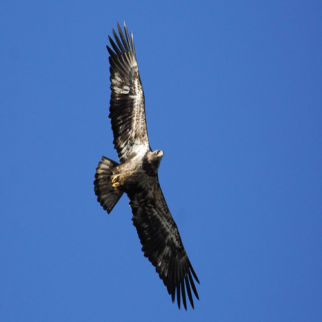

In [44]:
resize_322(orig_img)

In [45]:
resize

NameError: name 'resize' is not defined

In [64]:
# center_crop_224(T_inv_spatial(resize_322(resize_224(T_spatial(resize_322(orig_img))))))


first_output = tensorize(resize_224(T_spatial(resize_322(orig_img))))
res = center_crop_224(T_inv_spatial(F.interpolate(first_output.unsqueeze(0), (322, 322), mode='bilinear')))

tensor([[-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -5.0827e-05, -2.4442e-05, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -1.2495e-05, -1.2066e-04, -0.0000e+00, -1.4593e-04,
         -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -3.0652e-04, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+0

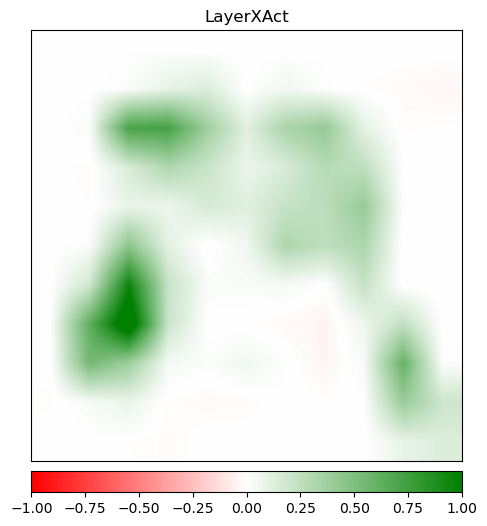

: 

In [14]:
attr, _ = expl_func(_orig_img, "init")
print(attr[0, 0, :, :])
attr = LayerAttribution.interpolate(attr, _orig_img.shape[2:], 'bilinear')
print(attr[0, 0, :, :])

attr = np.transpose(attr.squeeze(0).cpu().detach().numpy(), (1,2,0))

# print(attr)
# plt.imshow(attr, cmap="seismic")
# plt.colorbar()
# plt.show()
# print(attr.shape)
# print(torch.sum(attr))
# plt.imshow(attr)
# plt.colorbar()
# sttr = (attr - torch.min(attr)) / (torch.max(attr) - torch.min(attr))

# rint(attr)
_ = viz.visualize_image_attr(attr, np.transpose(_orig_img.squeeze().cpu().detach().numpy(), (1,2,0)), method="heat_map", sign = 'all', show_colorbar=True, title = expl_method)